# Challenge 3
* Use the data file "challenge 3.gwf" with channel "H1:CHALLENGE3"
* These are real LIGO data from O2, though we've adjusted the time labels and added some simulated signals.
* The data contain a loud simulated signal with m1 = m2 = 10 solar masses.


# Installing and Loading Data

In [1]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install matplotlib==3.1.3

     |████████████████████████████████| 46.2 MB 2.7 MB/s 
     |████████████████████████████████| 51 kB 4.6 MB/s 
     |████████████████████████████████| 1.4 MB 42.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 295 kB 34.1 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 3.6 MB 31.5 MB/s 
     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 11.2 MB 47.1 MB/s 
     |████████████████████████████████| 895 kB 58.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 6.7 MB 4.3 MB/s 
     |████████████████

In [3]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf


--2022-02-15 03:55:57--  https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256815066 (245M)
Saving to: ‘challenge3.gwf.1’

challenge3.gwf.1    100%[===================>] 244.92M  21.1MB/s    in 79s     

2022-02-15 03:57:16 (3.11 MB/s) - ‘challenge3.gwf.1’ saved [256815066/256815066]



## Question 1
What is the merger time of this signal? 

In [6]:
from gwpy.timeseries import TimeSeries
from pycbc import frame

gwpy_strain = TimeSeries.read('challenge3.gwf', channel="H1:CHALLENGE3")
pycbc_strain = frame.read_frame('challenge3.gwf', 'H1:CHALLENGE3')
print(gwpy_strain)

TimeSeries([-3.04517369e-19, -3.35465069e-19, -3.35210566e-19,
            ...,  4.46471052e-19,  5.07624678e-19,
             4.98623016e-19]
           unit: ct,
           t0: 0.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE3,
           channel: H1:CHALLENGE3)


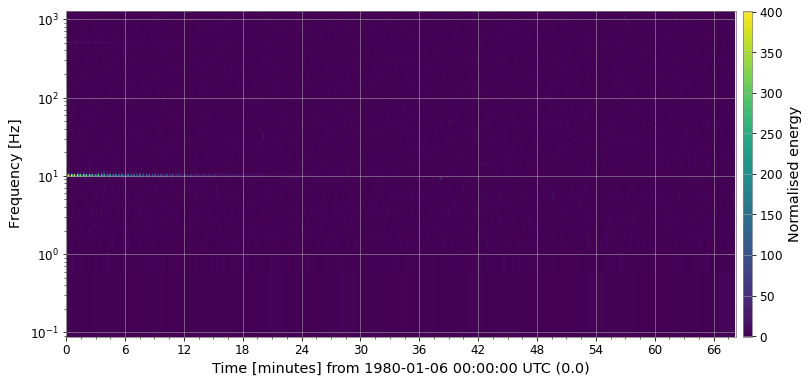

In [8]:
q_transform = gwpy_strain.q_transform()
plot = q_transform.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

We can see a faint line at a frequency of 10 Hz, so let's zoom into that region

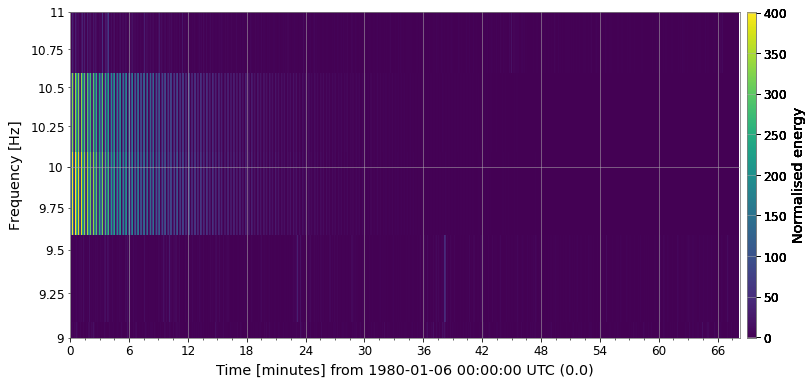

In [15]:
q_transform = gwpy_strain.q_transform(frange=(9,11), qrange=(100,120))
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")
plot

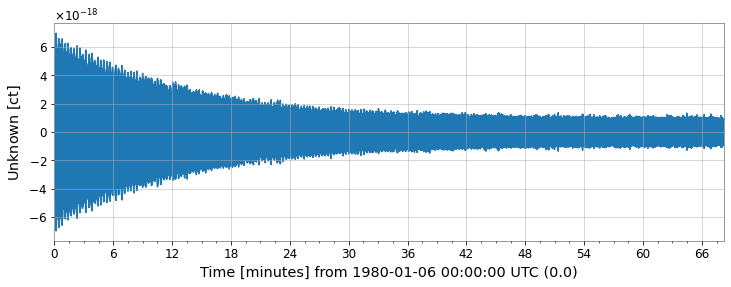

In [16]:
plot = gwpy_strain.plot()
